# COGS 108 - Data Checkpoint

# Names

- Allen Zou
- Brian Han
- Dillen Padhiar
- Lian Su


# Research Question

What is the relationship between certain factors (particularly with personal factors such as sex and age, parental and family factors such as their education, size, income, etc., school performance factors such as workload/free time, educational support, grades, etc.) and frequent alcohol use by high school students in the United States?

What is the relationship between frequent alcohol use by high school students in the United States and certain health-related factors such as substance use, healthy eating habits, exercise, mental health/psychological factors, etc.?

# Dataset(s)

- Dataset Name: YRBSS Data & Documentation
- Link to the dataset: https://www.cdc.gov/healthyyouth/data/yrbs/data.htm
- Number of observations: 201,991 observations

 The YRBSS Data & Documentation datasets contain responses national surveys that are administrated on odd years starting from 1991. They contain questions that primarily focus on health-related issues and health-risk behaviors of high school students.

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# import patsy
# import statsmodels.api as sm
# import os
# import folium
# from folium import plugins
# from folium.plugins import HeatMap

# Data Cleaning

There is a ton of data split among many years. We first, however, need to convert these datasets from mdb to xlsx to csv files outside of Jupyter Notebook. Then we should import and label them based on the years they came from.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import all the datasets
students_1991 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1991.csv')  
students_1993 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1993.csv')   
students_1995 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1995.csv')  
students_1997 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1997.csv')  
students_1999 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1999.csv')  
students_2001 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2001.csv')  
students_2003 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2003.csv')
students_2005 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2005.csv')
students_2007 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2007.csv')  
students_2009 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2009.csv')  
students_2011 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2011.csv')  
students_2013 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2013.csv')  
students_2015 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2015.csv')  
students_2017 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2017.csv')  
students_2019 = pd.read_csv('/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2019.csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (202,203) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Pandas is giving us a warning, saying that some columns have mixed types. We will list them here for reference:  
2005: columns 202 and 203 (nan values in a column of strings)  
2017: column 3 (string values in a column of floats)  
2019 columns 2 and 3 (string values in a column of floats)  

Additionally, we won't need all columns in these datasets, so we'll check on these after we select our desired columns.

Also, check to see how many responses are in all these datasets combined for the number of observations part in our dataset description near the top of this project.

In [ ]:
(len(students_1991) + len(students_1993) + len(students_1995) + len(students_1997) + len(students_2001) + 
 len(students_2003) + len(students_2005) + len(students_2007) + len(students_2009) + len(students_2011) + 
 len(students_2013) + len(students_2015) + len(students_2017) + len(students_2019))

201991

The amount of responses in these datasets can be overwhelming. Unfortunately, this is exacerbated by the disparity in both the number of question and type of questions among each of these datasets. Thus, a decent portion of the data cleaning process did occur outside (we'll try to explain what we did in the next Markdown cell). We'll have to select our columns manually in each of these datasets. A lot of questions tend to be framed around the same scenario but with different details, so we tried to pick the most general questions (for example, many questions would say both "during your life" and "in the past 30 days," so we chose "during your life" if it exists since it covers a larger range of time). Below is the list of queries we think are applicable to our research question:
1. How old are you?
2. What is your sex?
3. In what grade are you?
4. How do you describe yourself?
5. During the past 30 days, on how many days did you carry a weapon such as a gun, knife, or club?
6. During the past 30 days, how many days did you not go to school because you felt you would be unsafe at school or on your way to or from school?
7. During the past 12 months, how many times were you in a physical fight?
8. During the past 12 months, did you ever feel so sad or hopeless almost every day for two weeks or more in a row that you stopped doing some usual activities?
9. During the past 12 months, did you ever seriously consider attempting suicide?
10. During the past 30 days, on how many days did you smoke cigarettes?
11. During the past 30 days, on how many days did you use chewing tobacco or snuff, such as Redman, Levi Garrett, Beechnut, Skoal, Skoal Bandits, or Copenhagen?
12. During your life, on how many days have you had at least one drink of alcohol?
13. During the past 30 days, on how many days did you have at least one drink of alcohol?
14. During the past 30 days, on how many days did you have five or more drinks of alcohol in a row, that is, within a couple of hours?
15. During your life, how many times have you used marijuana?
16. During your life, how many times have you used any form of cocaine, including powder, crack, or freebase?
17. During your life, how many times have you sniffed glue, or breathed the contents of aerosol spray cans, or inhaled any paints or sprays to get high?
18. During your life, how many times have you used heroin (also called smack, junk, or China White)?
19. During your life, how many times have you used methamphetamines (also called speed, crystal, crank, or ice)?
20. During your life, how many times have you taken steroid pills or shots without a doctor's prescription?
21. During the past seven days, how many times did you drink 100% fruit juices such as orange juice, apple juice, or grape juice?
22. During the past seven days, how many times did you eat fruit?
23. During the past seven days, how many times did you eat green salad?
24. During the past seven days, how many times did you eat potatoes?
25. During the past seven days, how many times did you eat carrots?
26. During the past seven days, how many times did you eat other vegetables?
27. During the past seven days, how many glasses of milk did you drink?
28. On how many of the past seven days did you exercise or participate in physical activities for at least 20 minutes that made you sweat and breathe hard?
29. On how many of the past seven days did you do exercises to strengthen or tone your muscles, such as push-ups, sit-ups, or weight lifting?


We mentioned above that there is a pretty big disparity among the questions. This inculudes missing questions in some surveys, different questions, different answers, and different orderings. Below is a table that we created to try to indicate where each of these 29 questions are and if there are any issues with these questions in a particular survey. This should help us figure out what questions we should include and perhaps even a specific subset of years we want to analyze.

| Question                                                                                                                                                      | 1991                                                                              | 1993                                                                              | 1995                                                       | 1997                                                       | 1999 | 2001 | 2003 | 2005 | 2007                                                           | 2009                                                           | 2011                                                           | 2013                                                           | 2015                                                           | 2017                                                           | 2019                                                           |
|---------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------------------|------|------|------|------|----------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|
| How old are you?                                                                                                                                              | Q1                                                                                | Q1                                                                                | Q1                                                         | Q1                                                         | Q1   | Q1   | Q1   | Q1   | Q1                                                             | Q1                                                             | Q1                                                             | Q1                                                             | Q1                                                             | Q1                                                             | Q1                                                             |
| What is your sex?                                                                                                                                             | Q2                                                                                | Q2                                                                                | Q2                                                         | Q2                                                         | Q2   | Q2   | Q2   | Q2   | Q2                                                             | Q2                                                             | Q2                                                             | Q2                                                             | Q2                                                             | Q2                                                             | Q2                                                             |
| In what grade are you?                                                                                                                      | Q3                                                                                | Q3                                                                                | Q3                                                         | Q3                                                         | Q3   | Q3   | Q3   | Q3   | Q3                                                             | Q3                                                             | Q3                                                             | Q3                                                             | Q3                                                             | Q3                                                             | Q3                                                             |
| How do you describe yourself?                                                                                                                | Ignore this row because the differences among the documents are very big          |                                                                                   |                                                            |                                                            |      |      |      |      |                                                                |                                                                |                                                                |                                                                |                                                                |                                                                |                                                                |
| During the past 30 days, on how many days did you carry a weapon such as a gun, knife, or club?                                                               | Q14                                                                               | Q13                                                                               | Q12                                                        | Q12                                                        | Q12  | Q13  | Q12  | Q12  | Q12                                                            | Q12                                                            | Q12                                                            | Q13                                                            | Q13                                                            | Q12                                                            | Q12                                                            |
| During the past 30 days, how many days did you not go to school because you felt you would be unsafe at school or on your way to or from school?              | None                                                                              | Q16                                                                               | Q15                                                        | Q15                                                        | Q15  | Q16  | Q15  | Q15  | Q15                                                            | Q15                                                            | Q15                                                            | Q16                                                            | Q16                                                            | Q15                                                            | Q15                                                            |
| During the past 12 months, how many times were you in a physical fight?                                                                                       | Q16                                                                               | Q19                                                                               | Q18                                                        | Q18                                                        | Q17  | Q18  | Q18  | Q18  | Q18                                                            | Q17                                                            | Q17                                                            | Q18                                                            | Q18                                                            | Q17                                                            | Q17                                                            |
| During the past 12 months, did you ever feel so sad or hopeless almost every day for two weeks or more in a row that you stopped doing some usual activities? | N/A                                                                               | N/A                                                                               | N/A                                                        | N/A                                                        | Q22  | Q23  | Q23  | Q23  | Q23                                                            | Q23                                                            | Q24                                                            | Q26                                                            | Q26                                                            | Q25                                                            | Q25                                                            |
| During the past 12 months, did you ever seriously consider attempting suicide?                                                                                | Q19                                                                               | Q24                                                                               | Q22                                                        | Q22                                                        | Q23  | Q24  | Q24  | Q24  | Q24                                                            | Q24                                                            | Q25                                                            | Q27                                                            | Q27                                                            | Q26                                                            | Q26                                                            |
| During the past 30 days, on how many days did you smoke cigarettes?                                                                                           | Q28                                                                               | Q32                                                                               | Q28                                                        | Q28                                                        | Q29  | Q30  | Q30  | Q30  | Q30                                                            | Q30                                                            | Q31                                                            | Q33                                                            | Q33                                                            | Q32                                                            | Q32                                                            |
| During the past 30 days, on how many days did you use chewing tobacco or snuff, such as Redman, Levi Garrett, Beechnut, Skoal, Skoal Bandits, or Copenhagen?  | Q31 (worded in the way of "did you use," which also has different answer choices) | Q36 (worded in the way of "did you use," which also has different answer choices) | Q34                                                        | Q34                                                        | Q36  | Q37  | Q36  | Q36  | Q36                                                            | Q36                                                            | Q37                                                            | Q39                                                            | Q37                                                            | Q37                                                            | Q37                                                            |
| During your life, on how many days have you had at least one drink of alcohol?                                                                                | Q33                                                                               | Q39                                                                               | Q37                                                        | Q37                                                        | Q39  | Q40  | Q39  | Q39  | Q39                                                            | Q39                                                            | Q40                                                            | Q41                                                            | Q41                                                            | Q40                                                            | N/A                                                            |
| During the past 30 days, on how many days did you have at least one drink of alcohol?                                                                         | Q34                                                                               | Q40                                                                               | Q38                                                        | Q38                                                        | Q41  | Q42  | Q41  | Q41  | Q41                                                            | Q41                                                            | Q42                                                            | Q43                                                            | Q43                                                            | Q42                                                            | Q41                                                            |
| During the past 30 days, on how many days did you have five or more drinks of alcohol in a row, that is, within a couple of hours?                            | Q35                                                                               | Q41                                                                               | Q39                                                        | Q39                                                        | Q42  | Q43  | Q42  | Q42  | Q42                                                            | Q42                                                            | Q43                                                            | Q44                                                            | Q44                                                            | Q44 (worded slightly differently)                              | Q42 (worded slightly differently)                              |
| During your life, how many times have you used marijuana?                                                                                                     | Q37                                                                               | Q44                                                                               | Q42                                                        | Q42                                                        | Q44  | Q45  | Q44  | Q44  | Q45                                                            | Q45                                                            | Q46                                                            | Q47                                                            | Q47                                                            | Q46                                                            | Q45                                                            |
| During your life, how many times have you used any form of cocaine, including powder, crack, or freebase?                                                     | Q40                                                                               | Q48                                                                               | Q46                                                        | Q46                                                        | Q48  | Q49  | Q48  | Q48  | Q49                                                            | Q49                                                            | Q50                                                            | Q50                                                            | Q50                                                            | Q49                                                            | Q50                                                            |
| During your life, how many times have you sniffed glue, or breathed the contents of aerosol spray cans, or inhaled any paints or sprays to get high?          | N/A                                                                               | N/A                                                                               | Q49                                                        | Q49                                                        | Q50  | Q51  | Q50  | Q50  | Q51                                                            | Q51                                                            | Q52                                                            | Q51                                                            | Q51                                                            | Q50                                                            | Q51                                                            |
| During your life, how many times have you used heroin (also called smack, junk, or China White)?                                                              | Q43 (included alot of other drugs in the same question)                           | Q51 (included alot of other drugs in the same question)                           | Q51 (included alot of other drugs in the same question)    | Q51 (included alot of other drugs in the same question)    | Q52  | Q53  | Q52  | Q51  | Q52                                                            | Q52                                                            | Q53                                                            | Q52                                                            | Q52                                                            | Q51                                                            | Q52                                                            |
| During your life, how many times have you used methamphetamines (also called speed, crystal, crank, or ice)?                                                  | N/A                                                                               | N/A                                                                               | N/A                                                        | N/A                                                        | Q53  | Q54  | Q53  | Q52  | Q53                                                            | Q53                                                            | Q54                                                            | Q53                                                            | Q53                                                            | Q52                                                            | Q53                                                            |
| During your life, how many times have you taken steroid pills or shots without a doctor's prescription?                                                       | Q44                                                                               | Q52                                                                               | Q50                                                        | Q50                                                        | Q54  | Q55  | Q55  | Q54  | Q55                                                            | Q55                                                            | Q56                                                            | Q55                                                            | Q56                                                            | Q55                                                            | Q55                                                            |
| During the past seven days, how many times did you drink 100% fruit juices such as orange juice, apple juice, or grape juice?                                 | Q62 (Yesterday with different answer choices: No, Yes 1, Yes 2+)                  | Q71 (Yesterday with different answer choices: No, Yes 1, Yes 2+)                  | Q71 (Yesterday with different answer choices: 0, 1, 2, 3+) | Q71 (Yesterday with different answer choices: 0, 1, 2, 3+) | Q72  | Q73  | Q73  | Q71  | Q72                                                            | Q72                                                            | Q72                                                            | Q71                                                            | Q71                                                            | Q70                                                            | Q69                                                            |
| During the past seven days, how many times did you eat fruit?                                                                                                 | Q61 (Yesterday with different answer choices, No, Yes 1, Yes 2+)                  | Q70 (Yesterday with different answer choices, No, Yes 1, Yes 2+)                  | Q70 (Yesterday with different answer choices: 0, 1, 2, 3+) | Q70 (Yesterday with different answer choices: 0, 1, 2, 3+) | Q73  | Q74  | Q74  | Q72  | Q73                                                            | Q73                                                            | Q73                                                            | Q72                                                            | Q72                                                            | Q71                                                            | Q70                                                            |
| During the past seven days, how many times did you eat green salad?                                                                                           | Q63 (Yesterday with different answer choices, No, Yes 1, Yes 2+)                  | Q72 (Yesterday with different answer choices, No, Yes 1, Yes 2+)                  | Q72 (Yesterday with different answer choices: 0, 1, 2, 3+) | Q72 (Yesterday with different answer choices: 0, 1, 2, 3+) | Q74  | Q75  | Q75  | Q73  | Q74                                                            | Q74                                                            | Q74                                                            | Q73                                                            | Q73                                                            | Q72                                                            | Q71                                                            |
| During the past seven days, how many times did you eat potatoes?                                                                                              | Q66 (Ate French Fries/Potato Chips Yesterday)                                     | Q75 (Ate French Fries/Potato Chips Yesterday)                                     | Q75 (Ate French Fries/Potato Chips Yesterday)              | Q75 (Ate French Fries/Potato Chips Yesterday)              | Q75  | Q76  | Q76  | Q74  | Q75 (Do not count French Fries, Fried Potato, or Potato Chips) | Q75 (Do not count French Fries, Fried Potato, or Potato Chips) | Q75 (Do not count French Fries, Fried Potato, or Potato Chips) | Q74 (Do not count French Fries, Fried Potato, or Potato Chips) | Q74 (Do not count French Fries, Fried Potato, or Potato Chips) | Q73 (Do not count French Fries, Fried Potato, or Potato Chips) | Q72 (Do not count French Fries, Fried Potato, or Potato Chips) |
| During the past seven days, how many times did you eat carrots?                                                                                               | N/A                                                                               | N/A                                                                               | N/A                                                        | N/A                                                        | Q76  | Q77  | Q77  | Q75  | Q76                                                            | Q76                                                            | Q76                                                            | Q75                                                            | Q75                                                            | Q74                                                            | Q73                                                            |
| During the past seven days, how many times did you eat other vegetables?                                                                                      | N/A                                                                               | N/A                                                                               | N/A                                                        | N/A                                                        | Q77  | Q78  | Q78  | Q76  | Q77                                                            | Q77                                                            | Q77                                                            | Q76                                                            | Q76                                                            | Q75                                                            | Q74                                                            |
| During the past seven days, how many glasses of milk did you drink?                                                                                           | N/A                                                                               | N/A                                                                               | N/A                                                        | N/A                                                        | Q78  | Q79  | Q79  | Q77  | Q79                                                            | Q79                                                            | Q90                                                            | Q78                                                            | Q78                                                            | Q77                                                            | Q76                                                            |
| On how many of the past seven days did you exercise or participate in physical activities for at least 20 minutes that made you sweat and breathe hard?       | Q68                                                                               | Q77                                                                               | Q77                                                        | Q77                                                        | Q79  | Q80  | Q80  | Q78  | Q90                                                            | Q91                                                            | N/A                                                            | N/A                                                            | N/A                                                            | N/A                                                            | N/A                                                            |
| On how many of the past seven days did you do exercises to strengthen or tone your muscles, such as push-ups, sit-ups, or weight lifting?                     | Q70                                                                               | Q79                                                                               | Q79                                                        | Q79                                                        | Q81  | Q82  | Q82  | N/A  | N/A                                                            | N/A                                                            | Q92                                                            | Q88                                                            | Q95                                                            | Q95                                                            | Q95                                                            |

This table is very insightful for figuring our what we want to keep. We would like to make the following notes for our decision making process:
- Almost half of the questions we selected are only usable starting from 1999, a large portion of which are questions about healthy eating habits. This is because these questions either had drastically different wordings or didn't exist before 1999.
- Only the 3 questions below can’t be used.
    - How do you describe yourself: some years split the Hispanic options and made that a separate question, one year had that option missing entirely, some of the non-Hispanic answer choices are inconsistent across the years, etc.
    - During your life, on how many days have you had at least one drink of alcohol: Missing entry on 2019
    - During the past seven days, how many times did you eat potatoes: Some surveys considered eating potato chips as eating potatos while some didn't.
    - Both exercise questions (28 and 29): there are a ton of missing entries starting past 1997.

Overall, we think we should prune the 1991 - 1997 datasets since so many questions had issues in that range as well as exclude the three questions that can't be used. Now we begin the data cleaning process on Jupyter Notebook itself.

First, let's start extracting and renaming the columns that we want (only for years 1999 - 2019)

In [ ]:
# Before we do anything, note that the datasets starting from 2005 all have lowercase columns names
# Extract the desired columns. Do not include the describe yourself, during your life alcohol, and exercise questions.
students_1999 = students_1999[["Q1", "Q2", "Q3", "Q12", "Q15", "Q17", "Q22", "Q23", "Q29", "Q36", "Q41", "Q42", "Q44", "Q48", "Q50", "Q52", "Q53", "Q54", "Q72", "Q73", "Q74", "Q76", "Q77", "Q78"]]
students_2001 = students_2001[["Q1", "Q2", "Q3", "Q13", "Q16", "Q18", "Q23", "Q24", "Q30", "Q37", "Q42", "Q43", "Q45", "Q49", "Q51", "Q53", "Q54", "Q55", "Q73", "Q74", "Q75", "Q77", "Q78", "Q79"]]
students_2003 = students_2003[["Q1", "Q2", "Q3", "Q12", "Q15", "Q18", "Q23", "Q24", "Q30", "Q36", "Q41", "Q42", "Q44", "Q48", "Q50", "Q52", "Q53", "Q55", "Q73", "Q74", "Q75", "Q77", "Q78", "Q79"]]
students_2005 = students_2005[["q1", "q2", "q3", "q12", "q15", "q18", "q23", "q24", "q30", "q36", "q41", "q42", "q44", "q48", "q50", "q51", "q52", "q54", "q71", "q72", "q73", "q75", "q76", "q77"]]
students_2007 = students_2007[["q1", "q2", "q3", "q12", "q15", "q18", "q23", "q24", "q30", "q36", "q41", "q42", "q45", "q49", "q51", "q52", "q53", "q55", "q72", "q73", "q74", "q76", "q77", "q79"]]
students_2009 = students_2009[["q1", "q2", "q3", "q12", "q15", "q17", "q23", "q24", "q30", "q36", "q41", "q42", "q45", "q49", "q51", "q52", "q53", "q55", "q72", "q73", "q74", "q76", "q77", "q79"]]
students_2011 = students_2011[["q1", "q2", "q3", "q12", "q15", "q17", "q24", "q25", "q31", "q37", "q42", "q43", "q46", "q50", "q52", "q53", "q54", "q56", "q72", "q73", "q74", "q76", "q77", "q90"]]
students_2013 = students_2013[["q1", "q2", "q3", "q13", "q16", "q18", "q26", "q27", "q33", "q39", "q43", "q44", "q47", "q50", "q51", "q52", "q53", "q55", "q71", "q72", "q73", "q75", "q76", "q78"]]
students_2015 = students_2015[["q1", "q2", "q3", "q13", "q16", "q18", "q26", "q27", "q33", "q37", "q43", "q44", "q47", "q50", "q51", "q52", "q53", "q56", "q71", "q72", "q73", "q75", "q76", "q78"]]
students_2017 = students_2017[["q1", "q2", "q3", "q12", "q15", "q17", "q25", "q26", "q32", "q37", "q42", "q44", "q46", "q49", "q50", "q51", "q52", "q55", "q70", "q71", "q72", "q74", "q75", "q77"]]
students_2019 = students_2019[["q1", "q2", "q3", "q12", "q15", "q17", "q25", "q26", "q32", "q37", "q41", "q44", "q45", "q50", "q51", "q52", "q53", "q55", "q69", "q70", "q71", "q73", "q74", "q76"]]

# Rename these columns to the following names: age, sex, grade, weapon, unsafe, fight, hopeless, suicide,
# cigarette, tobacco, 30_days_alcohol, consecutive_drinks, marijuana, cocaine, sniffed, heroin, methaphetamines,
# steroids, juice, fruit, salad, carrots, vegetables, and milk
# Note, you apparently have to pass in a normal matrix, not a DataFrame.
students_1999 = pd.DataFrame(students_1999.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2001 = pd.DataFrame(students_2001.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2003 = pd.DataFrame(students_2003.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2005 = pd.DataFrame(students_2005.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2007 = pd.DataFrame(students_2007.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2009 = pd.DataFrame(students_2009.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2011 = pd.DataFrame(students_2011.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2013 = pd.DataFrame(students_2013.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2015 = pd.DataFrame(students_2015.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2017 = pd.DataFrame(students_2017.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])
students_2019 = pd.DataFrame(students_2019.to_numpy(), columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", "30_days_alcohol", "consecutive_alcohol", "marijuana", "cocaine", "sniffed", "heroin", "methaphetamines", "steroids", "juice", "fruit", "salad", "carrots", "vegetables", "milk"])

Now that we have all our data, let's add a year column to all of them and combine these datasets.

In [ ]:
# Add a column specifying the year these entries came from since we're going to be combining datasets
students_1999['year'] = 1999
students_2001['year'] = 2001
students_2003['year'] = 2003
students_2005['year'] = 2005
students_2007['year'] = 2007
students_2009['year'] = 2009
students_2011['year'] = 2011
students_2013['year'] = 2013
students_2015['year'] = 2015
students_2017['year'] = 2017
students_2019['year'] = 2019

# Combine the datasets
students = pd.concat([students_1999, students_2001, students_2003, students_2005, students_2007,
                      students_2009, students_2011, students_2013, students_2015, students_2017,
                      students_2019])
students = students.reset_index(drop = True) # Don't add these indices as a new column

Finally, we can begin the data pruning process. There are a ton of NaN values throughout the data frame, but are there certain columns that have more NaN values than others?

In [ ]:
# Print out the number of NaN values in each column
for col in students:
    # Ignore the index column, though
    if(not(col == "index")):
        print("Number of NaN values in column", col, "is", students[col].isna().sum())

Number of NaN values in column age is 647
Number of NaN values in column sex is 802
Number of NaN values in column grade is 918
Number of NaN values in column weapon is 10438
Number of NaN values in column unsafe is 3175
Number of NaN values in column fight is 10523
Number of NaN values in column hopeless is 1802
Number of NaN values in column suicide is 1507
Number of NaN values in column cigarette is 7652
Number of NaN values in column tobacco is 5220
Number of NaN values in column 30_days_alcohol is 13220
Number of NaN values in column consecutive_alcohol is 8599
Number of NaN values in column marijuana is 5746
Number of NaN values in column cocaine is 3605
Number of NaN values in column sniffed is 8993
Number of NaN values in column heroin is 4715
Number of NaN values in column methaphetamines is 3547
Number of NaN values in column steroids is 9191
Number of NaN values in column juice is 4191
Number of NaN values in column fruit is 3917
Number of NaN values in column salad is 6113


We're going to do a little bit of EDA here because we're a bit suspicious as to why there are so many NaN values for some columns. Specifically, we're going to check if these missing entries are evenly distributed among the different years.

In [ ]:
# Print out the number of NaN values in each column for each year
for col in students:
    # Ignore the index column, though
    if(not(col == "index")):
        # For each column, find the number of NaN values for each year
        year = 1999
        while(year <= 2019):
            print("Number of NaN values in column", col, "for year", year, "is", students[col][students["year"] == year].isna().sum())
            year += 2

# That's weird. For the columns with a large number of missing values, it's almost always the last 3 years that
# have a significant number of entries missing. Let's check the size of each year
year = 1999
while(year <= 2019):
    print("Size of year", year, "is", len(students[students["year"] == year]))
    year += 2

Number of NaN values in column age for year 1999 is 31
Number of NaN values in column age for year 2001 is 27
Number of NaN values in column age for year 2003 is 50
Number of NaN values in column age for year 2005 is 50
Number of NaN values in column age for year 2007 is 61
Number of NaN values in column age for year 2009 is 70
Number of NaN values in column age for year 2011 is 62
Number of NaN values in column age for year 2013 is 77
Number of NaN values in column age for year 2015 is 66
Number of NaN values in column age for year 2017 is 81
Number of NaN values in column age for year 2019 is 72
Number of NaN values in column sex for year 1999 is 76
Number of NaN values in column sex for year 2001 is 47
Number of NaN values in column sex for year 2003 is 72
Number of NaN values in column sex for year 2005 is 60
Number of NaN values in column sex for year 2007 is 13
Number of NaN values in column sex for year 2009 is 65
Number of NaN values in column sex for year 2011 is 61
Number of 

We're not going to bore you with spam, but what we found out is that some columns have a considerably higher number of missing entries (at least 8000 entries missing), which are weapon, fight, 30_days_alcohol, consecutive_alcohol, sniffed, steroids, and milk. For those columns, missing entries tend to come from the surveys in the last 3 datasets (2015, 2017, and 2019). We do want to make a small note, however, that only the 30_days_alcohol column doesn't exhibit this pattern. The missing entries seem pretty uniformly distributed across all years.

Double checking the questions in the manuals for all years, none of the questions and answers are worded differently except for the question asking about how many times did the student have 5 or more consecutive drinks of alcohol in the past 30 days. In the last 2 datasets (not 3, which we were suspecting), the question was worded to be "4 or more" for female students and "5 or more" for male students. We feel like this small change in wording shouldn't have caused such a big disparity in number of missing responses for consecutive_alcohol. It's even more strange that there is a difference in the other columns that didn't even have a change in question.

We think it may still be safe to prune these students without much risk in altering our analysis much because the trends noted above are roughly the same for each column, but we'll still store  the columns with these missing entries just in case we still want to analyze it to see if the outcome of our models and plots do differ. That is, we'll also pay more attention to these most recent 3 datasets in our analysis to see if anything is noticeably differnt.

In [ ]:
# Store the missing entries in another data frame
missing = students[students.isnull().any(axis=1)]

# Now let's get rid of these missing entries
students = students.dropna()

Most of the cleanup is pretty much done, but let's not forget about the warning near the top of the data cleaning section, specifically about mixed types in some columns. For reference, these were the datasets and columns that had issues:  
2005: columns 202 and 203 (nan values in a column of strings)  
2017: column 3 (string values in a column of floats)  
2019 columns 2 and 3 (string values in a column of floats)  

Columns 202 and 203 are pruned from our dataset (those columns are based on new information that isn't present in all datasets), so we don't need to consider those. Luckily, column 3 in the 2017 dataset as well as 2 and 3 in the 2019 dataset don't correspond to any of the questions we selected -- we solved the error as a side effect of performing the usual data cleaning procedure. We should still be safe and check the types of each column, however.

In [ ]:
# Check to see if we have objects (strings)
students.dtypes

age                    float64
sex                    float64
grade                  float64
weapon                 float64
unsafe                 float64
fight                  float64
hopeless               float64
suicide                float64
cigarette              float64
tobacco                float64
30_days_alcohol        float64
consecutive_alcohol    float64
marijuana              float64
cocaine                float64
sniffed                float64
heroin                 float64
methaphetamines        float64
steroids               float64
juice                  float64
fruit                  float64
salad                  float64
carrots                float64
vegetables             float64
milk                   float64
year                     int64
dtype: object

Perfect! Everything is in float64. Now one thing that we don't really like about this dataset is the fact that every response is coded, which makes it a lot harder to know what the answer are. Let's convert the responses to something a little more understandable. The answer choices on the surveys are coded in alphabets, but they are converted to numbers. From what we see, they converted it in the following manner:
A -> 1
B -> 2
C -> 3
...

This is consistent across all columns.

In [39]:
# Convert the age column
students["age"] = students["age"].replace(1, "12 or less")
students["age"] = students["age"].replace(2, "13")
students["age"] = students["age"].replace(3, "14")
students["age"] = students["age"].replace(4, "15")
students["age"] = students["age"].replace(5, "16")
students["age"] = students["age"].replace(6, "17")
students["age"] = students["age"].replace(7, "18 or more")
students["age"] = students["age"].replace(7, "18 or more")
students["age"] = students["age"].replace(7, "18 or more")
#Convert the sex column
students["sex"] = students["sex"].replace(1, "female")
students["sex"] = students["sex"].replace(2, "male")
#Convert the grade column
students["grade"] = students["grade"].replace(1, "9th")
students["grade"] = students["grade"].replace(2, "10th")
students["grade"] = students["grade"].replace(3, "11th")
students["grade"] = students["grade"].replace(4, "12th")
students["grade"] = students["grade"].replace(5, "others")
#Convert the weapon column
students['weapon']=students['weapon'].replace(1,"0 days")
students['weapon']=students['weapon'].replace(2,"1 days")
students['weapon']=students['weapon'].replace(3,"2-3 days")
students['weapon']=students['weapon'].replace(4,"4-5 days")
students['weapon']=students['weapon'].replace(6,"6 or more days")
#Convert the unsafe column
students['unsafe']=students['unsafe'].replace(1,'0 days')
students['unsafe']=students['unsafe'].replace(2,'1 days')
students['unsafe']=students['unsafe'].replace(3,'2-3 days')
students['unsafe']=students['unsafe'].replace(4,'4-5 days')
students['unsafe']=students['unsafe'].replace(5,'6 or more days')
#Convert the fight column
students['fight']=students['fight'].replace(1,'0 times')
students['fight']=students['fight'].replace(2,'1 times')
students['fight']=students['fight'].replace(3,'2-3 times')
students['fight']=students['fight'].replace(4,'4-5 times')
students['fight']=students['fight'].replace(5,'6-7 times')
students['fight']=students['fight'].replace(6,'8-9 times')
students['fight']=students['fight'].replace(7,'10-11 times')
students['fight']=students['fight'].replace(8,'12 or more times')
#Convert the hopeless column
students['hopeless']=students['hopeless'].replace(1,'yes')
students['hopeless']=students['hopeless'].replace(2,'no')
#Convert the suicide column
students['suicide']=students['suicide'].replace(1,'considered')
students['suicide']=students['suicide'].replace(2,'no')
#Convert the cigarette column
students['cigarette']=students['cigarette'].replace(1,'0 days')
students['cigarette']=students['cigarette'].replace(2,'1-2 days')
students['cigarette']=students['cigarette'].replace(3,'3-5 days')
students['cigarette']=students['cigarette'].replace(4,'6-9 days')
students['cigarette']=students['cigarette'].replace(5,'10-19 days')
students['cigarette']=students['cigarette'].replace(6,'20-29 days')
students['cigarette']=students['cigarette'].replace(7,'all 30 days')
#Convert the tobacco column
students['tobacco']=students['tobacco'].replace(1,'0 days')
students['tobacco']=students['tobacco'].replace(2,'1-2 days')
students['tobacco']=students['tobacco'].replace(3,'3-5 days')
students['tobacco']=students['tobacco'].replace(4,'6-9 days')
students['tobacco']=students['tobacco'].replace(5,'10-19 days')
students['tobacco']=students['tobacco'].replace(6,'20-29 days')
students['tobacco']=students['tobacco'].replace(7,'all 30 days')
#Convert the 30_days_alcohol column
students['30_days_alcohol']=students['30_days_alcohol'].replace(1,'0 days')
students['30_days_alcohol']=students['30_days_alcohol'].replace(2,'1-2 days')
students['30_days_alcohol']=students['30_days_alcohol'].replace(3,'3-5 days')
students['30_days_alcohol']=students['30_days_alcohol'].replace(4,'6-9 days')
students['30_days_alcohol']=students['30_days_alcohol'].replace(5,'10-19 days')
students['30_days_alcohol']=students['30_days_alcohol'].replace(6,'20-29 days')
students['30_days_alcohol']=students['30_days_alcohol'].replace(7,'all 30 days')
#Convert the consecutive_alcohol column
students['consecutive_alcohol']=students['consecutive_alcohol'].replace(1,'0 days')
students['consecutive_alcohol']=students['consecutive_alcohol'].replace(2,'1 days')
students['consecutive_alcohol']=students['consecutive_alcohol'].replace(3,'0 days')



This concludes our data cleaning section.

# Descriptive And Exploratory Data Analysis

Let's examine what we have so far with our dataset.  
Structure:
- Our data started our as MDB files, which were then converted to XLSX files, and then finally converted to CSV files. It's clear that our data is tabular.
- Importing our datasets puts each observation in separate rows. This is also confirmed by all the manuals that come along with these datasets, which denotes that each row represents a survey response from a student.
- We had to join these datasets because they are separated by year, although the questions were in different order, so we had to select and organize them before doing so.

Granularity: 
- As mentioned in structure, the manuals indicate that each row represents a survey response from a student.

Scope:
- All manuals say that the datasets are based on national surveys that relied on cluster sampling public, Catholic, and private schools throughout the United States.
- These surveys also cover students of all grade levels in high school (9th - 12th grade)

Temporality:
- These datasets cover years 1991 - 2019, although for the purpose of our project, we will only take a look at years 1999 - 2019 because of the limited number of questions on YRBS's surveys during 1991 - 2017

We will save faithfulness for the very end of our descriptive and exploratory data analysis because we currently don't know if there's anything suspicious in this dataset outside of the missing entries described during our data cleaning process.

One of the concerns we have is the existence of duplicate entries. The entries in these datasets have no unique ID, unfortunately (or fortunately because the manuals noted that the data collectors designed the surveys to be anonymous), although all manuals say that each row should correspond to a student's survey response. but we do want to see if there are any duplicate rows.

In [ ]:
print("Number of duplicate rows in dataset 1999: ", students[students["year"] == 1999].duplicated().sum())
print("Number of duplicate rows in dataset 2001: ", students[students["year"] == 2001].duplicated().sum())
print("Number of duplicate rows in dataset 2003: ", students[students["year"] == 2003].duplicated().sum())
print("Number of duplicate rows in dataset 2005: ", students[students["year"] == 2005].duplicated().sum())
print("Number of duplicate rows in dataset 2007: ", students[students["year"] == 2007].duplicated().sum())
print("Number of duplicate rows in dataset 2009: ", students[students["year"] == 2009].duplicated().sum())
print("Number of duplicate rows in dataset 2011: ", students[students["year"] == 2011].duplicated().sum())
print("Number of duplicate rows in dataset 2013: ", students[students["year"] == 2013].duplicated().sum())
print("Number of duplicate rows in dataset 2015: ", students[students["year"] == 2015].duplicated().sum())
print("Number of duplicate rows in dataset 2017: ", students[students["year"] == 2017].duplicated().sum())
print("Number of duplicate rows in dataset 2019: ", students[students["year"] == 2019].duplicated().sum())

Number of duplicate rows in dataset 1999:  228
Number of duplicate rows in dataset 2001:  219
Number of duplicate rows in dataset 2003:  273
Number of duplicate rows in dataset 2005:  209
Number of duplicate rows in dataset 2007:  194
Number of duplicate rows in dataset 2009:  320
Number of duplicate rows in dataset 2011:  173
Number of duplicate rows in dataset 2013:  277
Number of duplicate rows in dataset 2015:  321
Number of duplicate rows in dataset 2017:  311
Number of duplicate rows in dataset 2019:  202


Considering that we have a lot less columns and around 10,000 - 15,000 students in each dataset, this is reasonable.

We also want to get a feel for what our data is like. Note that every column contains categorical variables because the survey only accepts fixed answer choices for the questions we chose. We'll do this by examining each column as a whole; for this, we'll take a look at the number of students in each category of the column. We'll also see if anything is much different across the years for those columns; this will be done by comparing the proportion of students in each category of the column for each year. We're also considering combining some of these columns together, which we will discuss more as we examine our data. Let's start off by looking at the age column.

In [ ]:
# First, make these plots and font bigger 
sns.set(rc = {'figure.figsize':(25, 15)})
SIZE = 25
plt.rc('font', size = SIZE)
plt.rc('axes', titlesize = SIZE)
plt.rc('axes', labelsize = SIZE)
plt.rc('xtick', labelsize = SIZE)
plt.rc('ytick', labelsize = SIZE)
plt.rc('legend', fontsize = SIZE) 
plt.rc('figure', titlesize = SIZE)

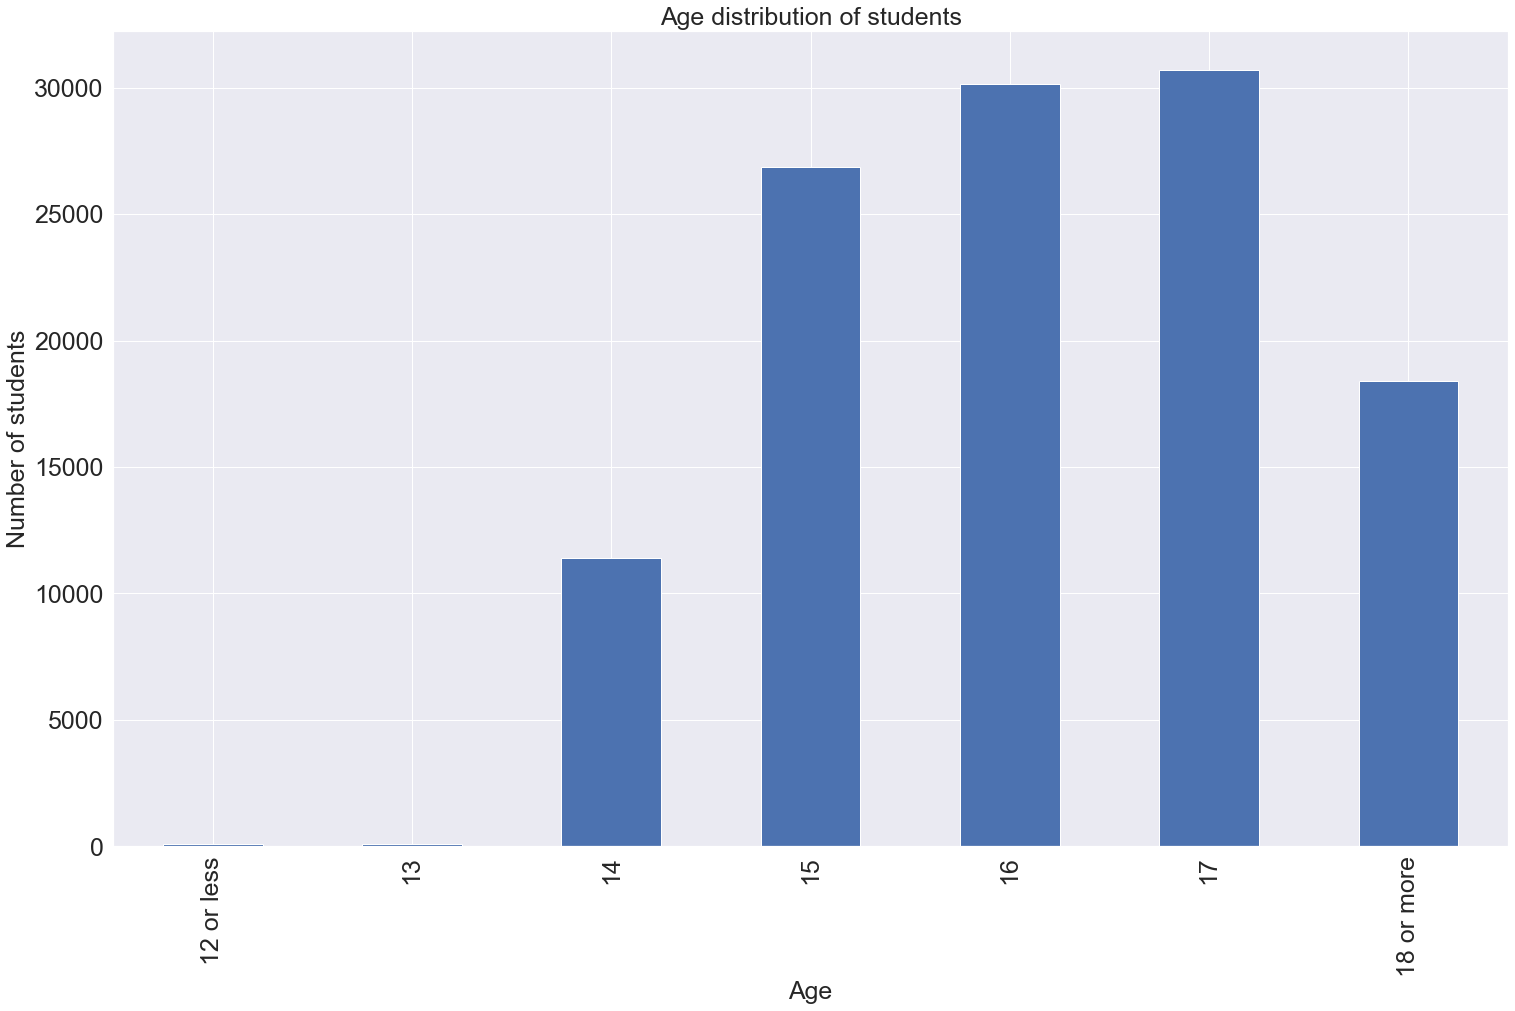

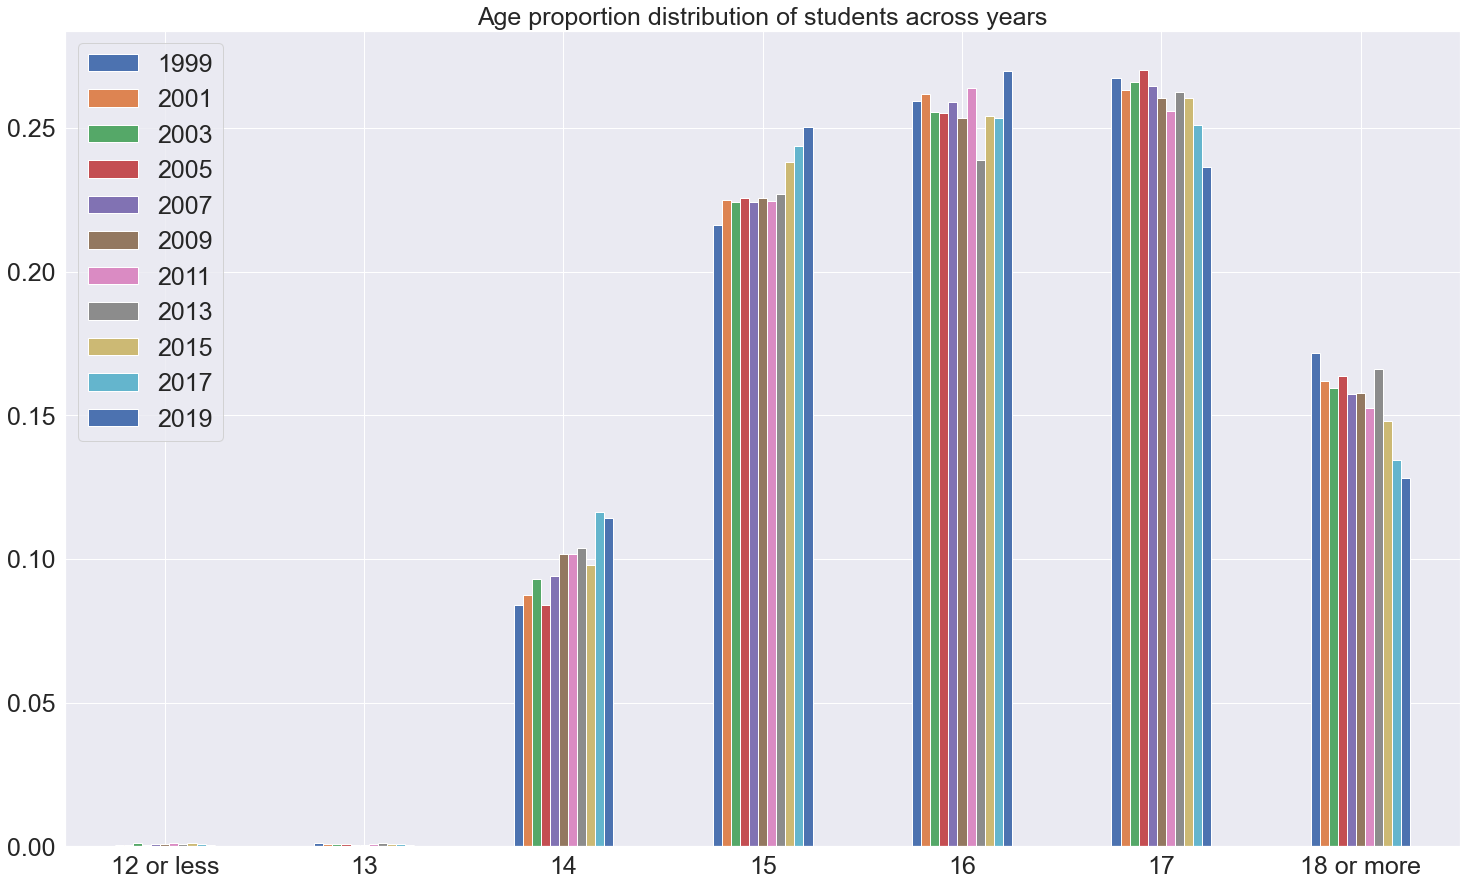

In [ ]:
# Examine the distribution of age
ax = students["age"].value_counts().sort_index().plot(kind = "bar", title = "Age distribution of students")
ax.set_xlabel("Age")
ax.set_ylabel("Number of students")
plt.show()

# Make a grouped bar plot separated by years
df = pd.DataFrame({'1999': students["age"][students["year"] == 1999].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 1999])).tolist(),
                   '2001': students["age"][students["year"] == 2001].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2001])).tolist(),
                   '2003': students["age"][students["year"] == 2003].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2003])).tolist(), 
                   '2005': students["age"][students["year"] == 2005].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2005])).tolist(), 
                   '2007': students["age"][students["year"] == 2007].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2007])).tolist(), 
                   '2009': students["age"][students["year"] == 2009].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2009])).tolist(), 
                   '2011': students["age"][students["year"] == 2011].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2011])).tolist(), 
                   '2013': students["age"][students["year"] == 2013].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2013])).tolist(), 
                   '2015': students["age"][students["year"] == 2015].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2015])).tolist(), 
                   '2017': students["age"][students["year"] == 2017].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2017])).tolist(), 
                   '2019': students["age"][students["year"] == 2019].value_counts().sort_index().transform(lambda x: x / len(students["age"][students["year"] == 2019])).tolist()},
                   index = np.sort(students["age"].unique().tolist()))
ax.set_xlabel("Age")
ax.set_ylabel("Proportion of students")
ax = df.plot.bar(rot = 0, title = "Age proportion distribution of students across years")

There are several things to note about the age distributions:
- Almost none of the students are 13 years or younger, which matches our expectations. Those few students who are 13 or younger are probably some fast learners.
- The median age seems to be around 16 - 17. There are a few students that are 14 or 18+ years old, but this is normal for high school.
- Looking at the proportions of students in each category each year, they seem to be roughly the same across all years, which is as expected.

In [ ]:
# Project Proposal (updated)

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/14  | 2 PM  | Brainstorm ideas for EDA, specifically what parts of the data we want to compare and how we will visualize them  | Review progress on EDA, discuss which analysis methods will work best |
| 2/21  | 2 PM  | Find more datasets, redo checkpoint 1 for those dataset, and implement the ideas we discussed for our EDA | Review progress on project for the check-in  |
| 2/28  | 2 PM  | Start writing code based on our ideas from the previous two meetings | Share each other’s code and start figuring out what to put on Github |
| 3/7  | 2 PM  | Have code and analysis finished, begin writing conclusion and drafting video ideas | Discuss the video portion of the project in terms of editing and content, review  |
